In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [4]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped", "particle mechanics": "swelling only"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 313.15})
param.update({"Initial temperature [K]": 313.15})
exp = pybamm.Experiment(
    ["Discharge at 1C until 2.5 V", "Charge at 0.3C until 4.2 V", "Hold at 4.2 V until C/100"]
)

pts200 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 200,  # negative particle
    "r_p": 20,  # positive particle
}

sim200 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts200)
solution200 = sim200.solve(calc_esoh=False)

pts100 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 20,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts60 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 20,  # positive particle
}

sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts60)
solution60 = sim60.solve(calc_esoh=False)

pts50 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 50,  # negative particle
    "r_p": 20,  # positive particle
}

sim50 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts50)
solution50 = sim50.solve(calc_esoh=False)

pts40 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 40,  # negative particle
    "r_p": 20,  # positive particle
}

sim40 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts40)
solution40 = sim40.solve(calc_esoh=False)

pts30 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 20,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

At t = 0.00326741 and h = 8.50365e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00326741 and h = 2.6287e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00331974 and h = 8.6462e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00331974 and h = 1.61043e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00340645 and h = 2.55675e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00340645 and h = 3.69434e-23, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00356815 and h = 1.10943e-22, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00356815 and h = 1.49241e-19, the corrector convergence failed repeatedly or with |h| = hmin.


In [5]:
t200 = solution200["Time [s]"].entries
t100 = solution100["Time [s]"].entries
t60 = solution60["Time [s]"].entries
t50 = solution50["Time [s]"].entries
t40 = solution40["Time [s]"].entries
t30 = solution30["Time [s]"].entries
T200 = solution200["Volume-averaged cell temperature [K]"].entries
T100 = solution100["Volume-averaged cell temperature [K]"].entries
T60 = solution60["Volume-averaged cell temperature [K]"].entries
T50 = solution50["Volume-averaged cell temperature [K]"].entries
T40 = solution40["Volume-averaged cell temperature [K]"].entries
T30 = solution30["Volume-averaged cell temperature [K]"].entries
print(f"With 200 points, average temperature over cycle is {np.average(T200)-273.15} degrees.")
print(f"With 100 points, average temperature over cycle is {np.average(T100)-273.15} degrees.")
print(f"With 60 points, average temperature over cycle is {np.average(T60)-273.15} degrees.")
print(f"With 50 points, average temperature over cycle is {np.average(T50)-273.15} degrees.")
print(f"With 40 points, average temperature over cycle is {np.average(T40)-273.15} degrees.")
print(f"With 30 points, average temperature over cycle is {np.average(T30)-273.15} degrees.")

With 200 points, average temperature over cycle is 42.33998962669659 degrees.
With 100 points, average temperature over cycle is 42.34045255529412 degrees.
With 60 points, average temperature over cycle is 42.38067937138186 degrees.
With 50 points, average temperature over cycle is 42.381932801813775 degrees.
With 40 points, average temperature over cycle is 42.384615734017586 degrees.
With 30 points, average temperature over cycle is 42.391464494412276 degrees.


In [6]:
Q200 = solution200["Discharge capacity [A.h]"].entries
Q200_max = np.max(Q200)
V200 = solution200["Terminal voltage [V]"].entries
Q100 = solution100["Discharge capacity [A.h]"].entries
Q100_max = np.max(Q100)
V100 = solution100["Terminal voltage [V]"].entries
Q60 = solution60["Discharge capacity [A.h]"].entries
Q60_max = np.max(Q60)
V60 = solution60["Terminal voltage [V]"].entries
Q50 = solution50["Discharge capacity [A.h]"].entries
Q50_max = np.max(Q50)
V50 = solution50["Terminal voltage [V]"].entries
Q40 = solution40["Discharge capacity [A.h]"].entries
Q40_max = np.max(Q40)
V40 = solution40["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
Q30_max = np.max(Q30)
V30 = solution30["Terminal voltage [V]"].entries
print(f"With 200 points, end of discharge capacity is {Q200_max} Ah and end of charge capacity is {Q200_max-Q200[-1]} Ah.")
print(f"With 100 points, end of discharge capacity is {Q100_max} Ah and end of charge capacity is {Q100_max-Q100[-1]} Ah.")
print(f"With 60 points, end of discharge capacity is {Q60_max} and end of charge capacity is {Q60_max-Q60[-1]} Ah.")
print(f"With 50 points, end of discharge capacity is {Q50_max} and end of charge capacity is {Q50_max-Q50[-1]} Ah.")
print(f"With 40 points, end of discharge capacity is {Q40_max} and end of charge capacity is {Q40_max-Q40[-1]} Ah.")
print(f"With 30 points, end of discharge capacity is {Q30_max} and end of charge capacity is {Q30_max-Q30[-1]} Ah.")

With 200 points, end of discharge capacity is 4.694917353785032 Ah and end of charge capacity is 4.678916962259929 Ah.
With 100 points, end of discharge capacity is 4.695317387747306 Ah and end of charge capacity is 4.679318846521585 Ah.
With 60 points, end of discharge capacity is 4.696138555313133 and end of charge capacity is 4.6801404066092 Ah.
With 50 points, end of discharge capacity is 4.696645769101443 and end of charge capacity is 4.680646259489088 Ah.
With 40 points, end of discharge capacity is 4.69750521282318 and end of charge capacity is 4.681503289863748 Ah.
With 30 points, end of discharge capacity is 4.699155783489643 and end of charge capacity is 4.683146993845838 Ah.


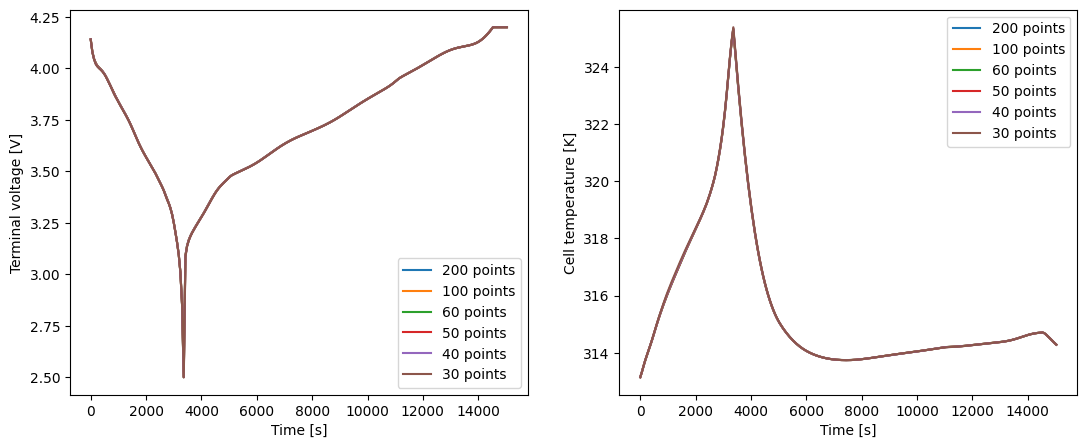

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))
ax1.plot(t200,V200,label="200 points")
ax1.plot(t100,V100,label="100 points")
ax1.plot(t60,V60,label="60 points")
ax1.plot(t50,V50,label="50 points")
ax1.plot(t40,V40,label="40 points")
ax1.plot(t30,V30,label="30 points")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Terminal voltage [V]")
ax1.legend()
ax2.plot(t200,T200,label="200 points")
ax2.plot(t100,T100,label="100 points")
ax2.plot(t60,T60,label="60 points")
ax2.plot(t50,T50,label="50 points")
ax2.plot(t40,T40,label="40 points")
ax2.plot(t30,T30,label="30 points")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Cell temperature [K]")
ax2.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/stress_induced_1C_discharge_318K.png")
plt.show()

In [12]:
np.max(t30)

15040.724507751711

In [ ]:
path = '/mnt/c/Users/sokane/pybamm_data/mesh_refinement/'
solution60.save(path+'uniform60_1C_discharge_283K.pkl')

In [ ]:
#t200_CV = solution200.cycles[2]["Time [s]"].entries
#t150_CV = solution150.cycles[2]["Time [s]"].entries
#t120_CV = solution120.cycles[2]["Time [s]"].entries
t100_CV = solution100.cycles[2]["Time [s]"].entries
t60_CV = solution60.cycles[2]["Time [s]"].entries
t30_CV = solution30.cycles[2]["Time [s]"].entries
#I200 = solution200.cycles[2]["Current [A]"].entries
#I150 = solution150.cycles[2]["Current [A]"].entries
#I120 = solution120.cycles[2]["Current [A]"].entries
I100 = solution100.cycles[2]["Current [A]"].entries
I60 = solution60.cycles[2]["Current [A]"].entries
I30 = solution30.cycles[2]["Current [A]"].entries
#Delta_t_CV_120 = t120_CV[-1]-t120_CV[0]
#Delta_t_CV_100 = t100_CV[-1]-t100_CV[0]
#print(f"For 120 points, CV phase lasts experiment ends at {Delta_t_CV_120} seconds.")
#print(f"For 100 points, CV phase lasts experiment ends at {Delta_t_CV_100} seconds.")

In [ ]:
fig, ax = plt.subplots()
#ax.plot(t200_CV,I200,label="200 points")
#ax.plot(t150_CV,I150,label="150 points")
#ax.plot(t120_CV,I120,label="120 points")
ax.plot(t100_CV,I100,label="100 points")
ax.plot(t60_CV,I60,label="60 points")
#ax.plot(t30_CV,I30,label="30 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.legend()
plt.show()